<a href="https://colab.research.google.com/github/proditorIF/Quanta/blob/main/Final_Proy/Final_project_SunSpots_McLearn_BRM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>>>>>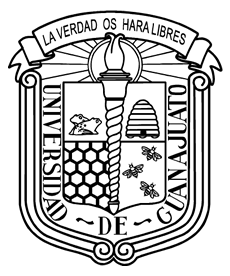

---



##**Introdución**


****

##***Código***

**Importación de librerias**

In [28]:
# Se importan las librerias empleadas
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM,Conv1D,Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from keras.utils import plot_model

###**Análisis exploratorio de datos (EDA)**

In [2]:
# Montamos nuestro Google Drive dónde se encutra el dataset
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
data = pd.read_csv('/content/drive/MyDrive/Machine_Learn/Final_proy/Sunspots.csv')
data=data.set_index("Date")
data.head()

,Unnamed: 0,Monthly Mean Total Sunspot Number
Date,,
1749-01-31,0,96.7
1749-02-28,1,104.3
1749-03-31,2,116.7
1749-04-30,3,92.8
1749-05-31,4,141.7


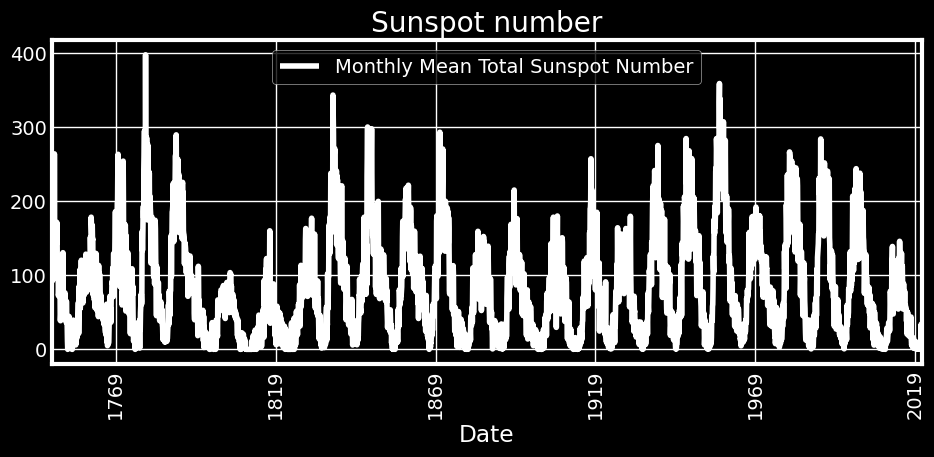

In [29]:
data["Monthly Mean Total Sunspot Number"].plot(figsize=(10,4),legend=True, color='white')
plt.style.use('dark_background')
plt.xticks(rotation=90)
plt.xlim([data.index.min(), data.index.max()])
plt.title('Sunspot number')
plt.show()

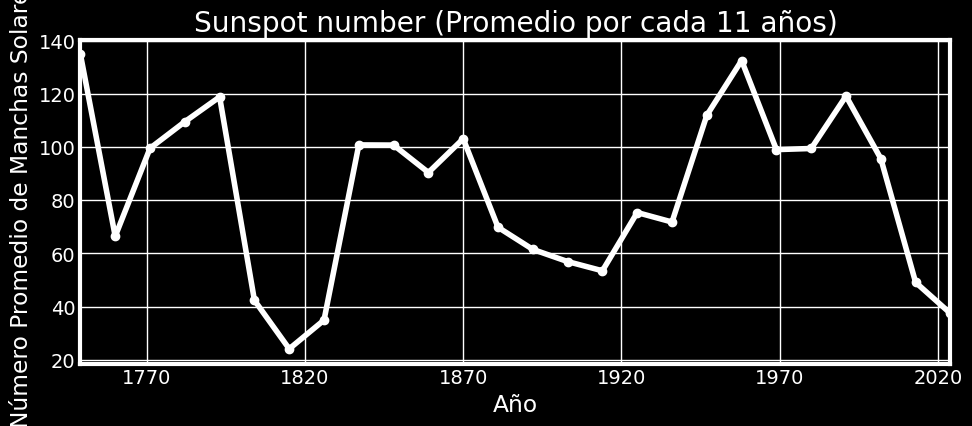

In [31]:
# Agregación de datos por ciclos de 11 años
data_resampled = data["Monthly Mean Total Sunspot Number"].resample('11A').mean()

# Visualización
data_resampled.plot(figsize=(10, 4), marker='o', color='white')
plt.title('Sunspot number (Promedio por cada 11 años)')
plt.xlabel('Año')
plt.ylabel('Número Promedio de Manchas Solares')
plt.show()

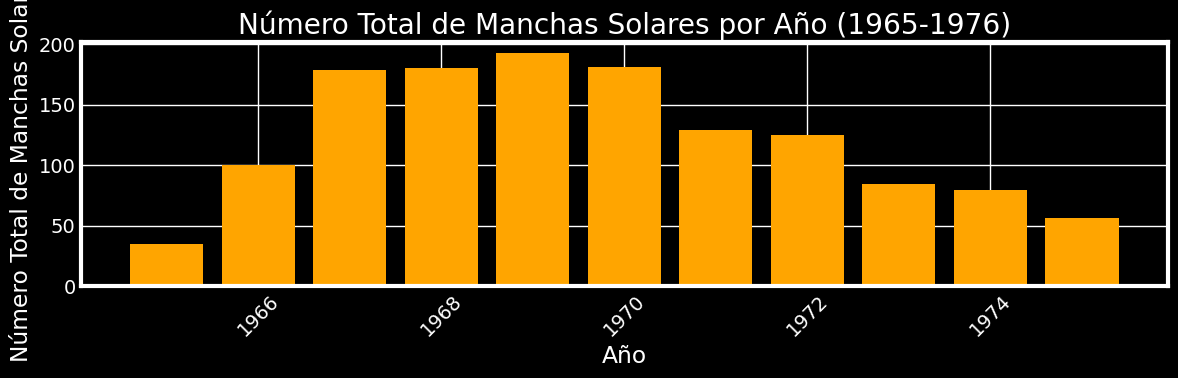

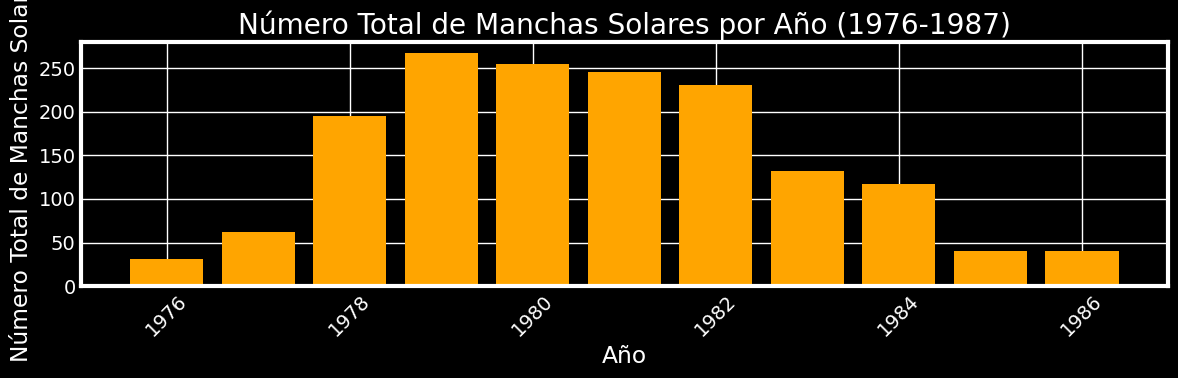

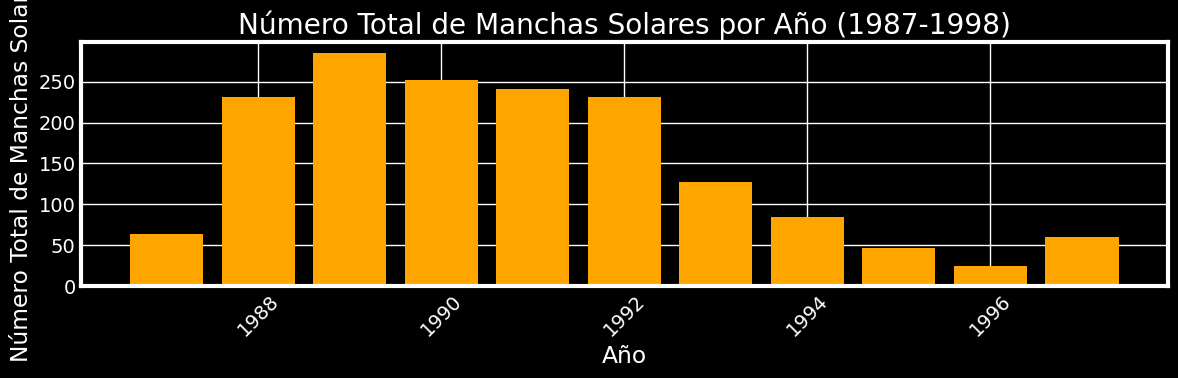

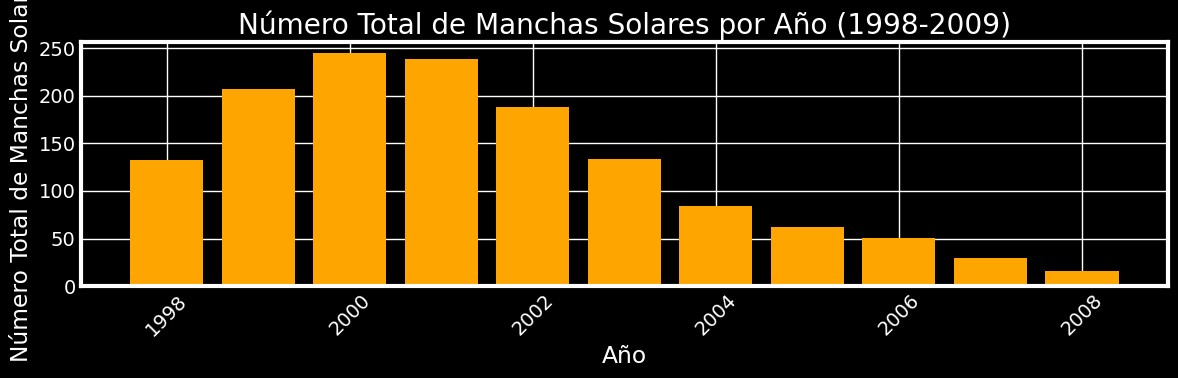

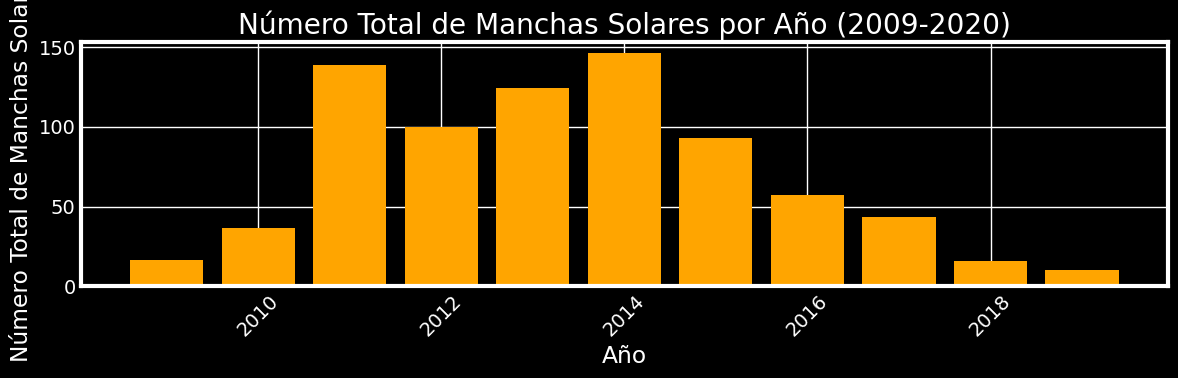

In [45]:
# Creamos grupos de 11 años
data['Date'] = pd.to_datetime(data.index)  # Asegúrate de que 'Date' esté en formato datetime
data['Year'] = data['Date'].dt.year
data['Group'] = (data['Year'] // 11) * 11

# Calculamos el total de manchas solares en cada grupo
grouped_data = data.groupby('Group')['Monthly Mean Total Sunspot Number'].sum()

# Creamos grupos para los ciclos específicos de Schwabe
cycles = [(1965, 1976),(1976, 1987), (1987, 1998), (1998, 2009), (2009, 2020)]

# Iteramos sobre los ciclos y creamos gráficos de barras separados
for cycle_start, cycle_end in cycles:
    cycle_data = data[(data['Year'] >= cycle_start) & (data['Year'] < cycle_end)]

    plt.figure(figsize=(12, 4))
    plt.bar(cycle_data['Year'], cycle_data['Monthly Mean Total Sunspot Number'], color='orange')
    plt.xlabel('Año')
    plt.ylabel('Número Total de Manchas Solares')
    plt.title(f'Número Total de Manchas Solares por Año ({cycle_start}-{cycle_end})')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

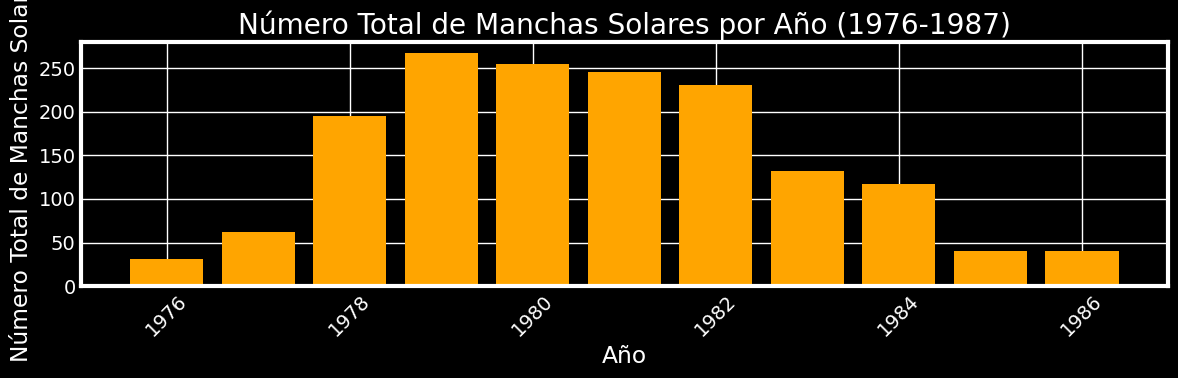

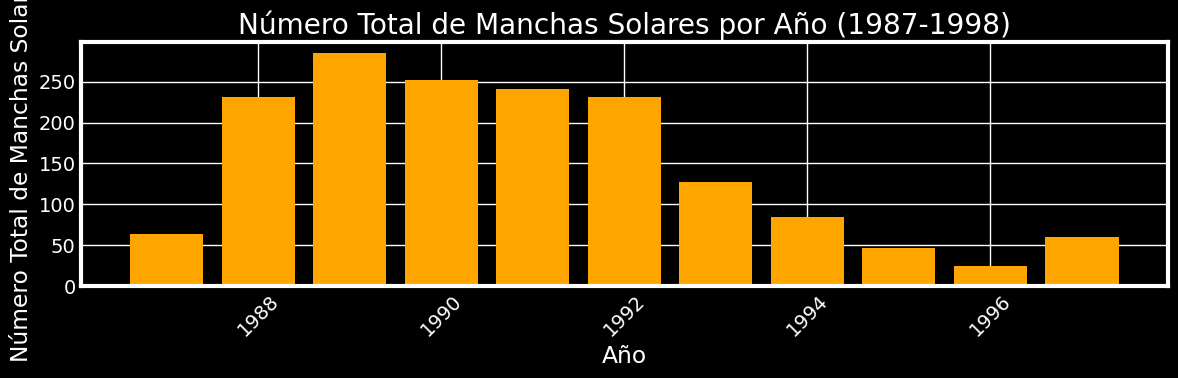

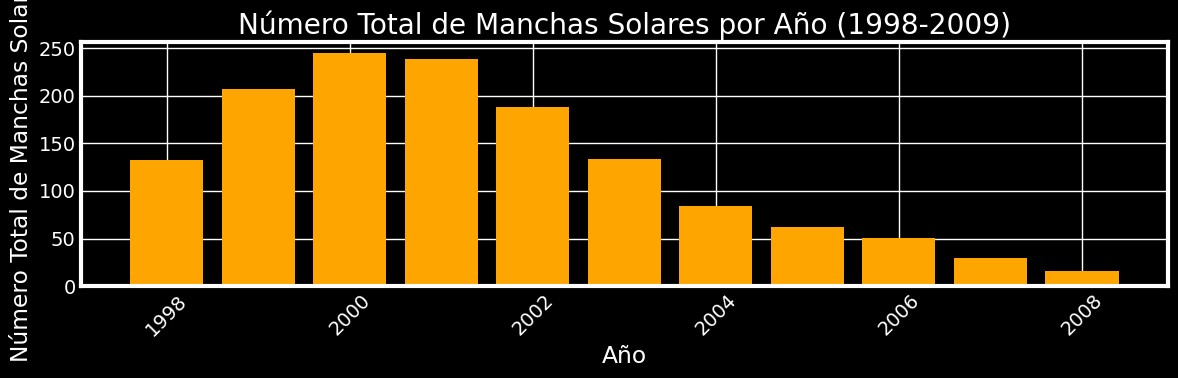

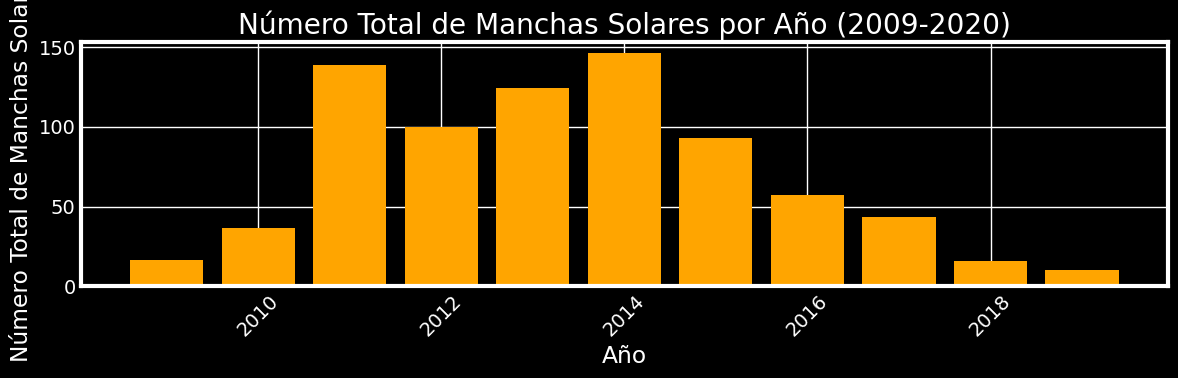